# Notes: [Networks of leaky integrate-and-fire neurons](https://neuronaldynamics.epfl.ch/online/Ch13.S4.html)

## Multiple populations

multiple populations $k=1,...,K$. The **population** with index $k$ contains $N_k$ **neurons** and ***its activity*** is denoted by $A_k$. We recall that $N_k A_k(t)\Delta t$ is the total number of spikes emitted by population $k$ in a short interval $\Delta t$.

Let us suppose that **population** $k$ sends its spikes to another **population** $n$. If each neuron in population n receives input from all neurons in $k$ the total spike arrival rate from population $k$ is therefore $\nu k(t)=N_k A_k(t)$ ('__full connectivity__'). If each neuron in population $n$ receives connections only from a subset of $C_{nk}$ randomly chosen neurons of population $k$, then the total spike arrival rate is $\nu_k(t)=C_{nk}A_k(t)$ ('__random connectivity__' with a __connection probability__ p_{nk}=C_{nk}/N_k from population $k$ to population $n$). We assume that all connections from $k$ to n have the same weight $w_{nk}$.

For each population $n=1,...,K$ we write down a Fokker-Planck equation analogous to Eq. (13.16). Neurons are leaky integrate-and-fire neurons. Within a population n, all neurons have the __same parameters__ $\tau_n$, $R_n$, $u_r^n$, and in particular the __same firing threshold__ $\vartheta_n$. For population $n$ the **Fokker-Planck equation** for the evolution of membrane potential densities is then

$$
\begin{split}
\tau_n\frac{\partial}{\partial t} p_n(u,t)=
&-\frac{\partial}{\partial u}\left\{
\left[-u+R_n I_n^{ext}(t)+\tau_n\sum_k C_{nk}A_k(t)w_{nk}\right]p_n(u,t)\right\}\\
&+\frac{1}{2}\left[\tau_n\sum_k C_{nk}A_k(t)w_{nk}^2\right]
\frac{\partial^2}{\partial u^2}p_n(u,t)\\
&+\tau_n A_n(t)\delta(u-u_\tau^n)-\tau_n A_n(t)\delta(u-\vartheta_n)
\end{split}
$$

The **population activity** $A_n$ is the flux through the threshold (cf. Eq. (13.20)), which gives in our case

$$A_n(t)=-\frac{1}{2}\left[\sum_k C_{nk}A_k(t) w_{nk}^2\right]\left(\frac{\partial p_n(u,t)}{\partial u}\right)_{u=\vartheta_n}$$

Thus populations interact with each other via the variable $A_k(t)$

<img src="figures/11-13.6.png"/> <img src="figures/11-13.6-2.png"/>

Interacting Populations. 

A. Five populations interact via their population activities $A_k$. The parameter $w_{nk}$ gives the synaptic weight of a connection from a __presynaptic neuron__ in __population__ $k$ to a __postsynaptic neuron__ in __population__ $n$. Not all populations are coupled with each other. 

B. **Brunel network**: An excitatory population of __leaky integrate-and-fire neurons__ is coupled to itself and to an inhibitory population. Neurons in both populations receive also external input from a third population with __population activity__ $A_{ext}=\nu_{ext}$ described as a homogeneous Poisson process.c


# Codes: [Network of LIF neurons (Brunel)](https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/brunel-network.html)

INFO       width adjusted from 1. ms to 1.05 ms [brian2.monitors.ratemonitor.adjusted_width]


(<Figure size 720x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f73aac24ba8>)

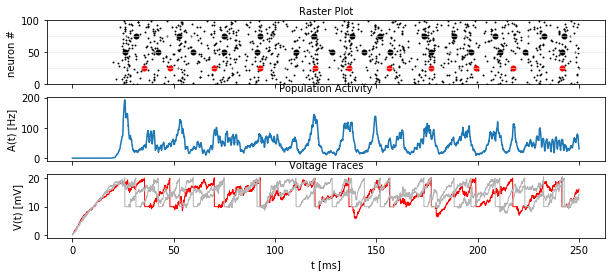

In [1]:
%matplotlib inline
from neurodynex.brunel_model import LIF_spiking_network
from neurodynex.tools import plot_tools
import brian2 as b2

rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx =\
    LIF_spiking_network.simulate_brunel_network(sim_time=250. * b2.ms)
plot_tools.plot_network_activity(
    rate_monitor, spike_monitor, voltage_monitor,
    spike_train_idx_list=monitored_spike_idx, t_min=0.*b2.ms)

In [2]:
# Default parameters of a single LIF neuron:
V_REST = 0. * b2.mV
V_RESET = +10. * b2.mV
FIRING_THRESHOLD = +20. * b2.mV
MEMBRANE_TIME_SCALE = 20. * b2.ms
ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms

# Default parameters of the network
SYNAPTIC_WEIGHT_W0 = 0.1 * b2.mV  
# note: w_ee=w_ie = w0 and = w_ei=w_ii = -g*w0
RELATIVE_INHIBITORY_STRENGTH_G = 4.  # balanced , i.e. g
CONNECTION_PROBABILITY_EPSILON = 0.1
SYNAPTIC_DELAY = 1.5 * b2.ms
POISSON_INPUT_RATE = 12. * b2.Hz
N_POISSON_INPUT = 1000

## Exercise: model parameters and threshold rate

In [11]:
%pfile LIF_spiking_network.simulate_brunel_network

In [6]:
from brian2 import NeuronGroup, Synapses, PoissonInput

In [7]:
NeuronGroup?

### Question:

In [14]:
# object 1
N_E=N_POISSON_INPUT
N_I=N_POISSON_INPUT/4
C_E=N_E*CONNECTION_PROBABILITY_EPSILON
C_I=N_I*CONNECTION_PROBABILITY_EPSILON
w_EE=SYNAPTIC_WEIGHT_W0
w_EI=-RELATIVE_INHIBITORY_STRENGTH_G*SYNAPTIC_WEIGHT_W0
w_IE=SYNAPTIC_WEIGHT_W0
w_II=-RELATIVE_INHIBITORY_STRENGTH_G*SYNAPTIC_WEIGHT_W0

In [27]:
# object 2
w_EE

100. * uvolt

In [26]:
# object 3

$$\nu_{threshold}=\frac{u_{thr}}{N_{extern}w_0\tau_m}$$

In [28]:
LIF_spiking_network.FIRING_THRESHOLD/(
    N_POISSON_INPUT*SYNAPTIC_WEIGHT_W0*SYNAPTIC_DELAY)

133.33333333 * hertz

In [ ]:
# object 4

* What is the meaning of the value 1 on the y-axis (Input). 

Input $I=1$ corresponds to a mean input just sufficient to reach the neuronal firing threshold (in the absence of recurrent input from the network). 

* What is the horizontal dashed line designating? 

the input which 

* How is it related to $u_{thr}$?

## Exercise: Population activity

### Question: Network states

### Question: Interspike interval (ISI) and Coefficient of Variation (CV)

## Exercise: Emergence of Synchronization


### Question:

## Bonus: Power Spectrum of the Population Activity

### Question: Sampling the Population Activity

### Question: Sampling a Single Neuron Spike Train

### Question: Single Neuron activity vs. Population Activity